**CREDIT SCORE CLASSIFICATION**

*NEURAL NETWORKS CAN BE USED FOR THIS CLASSIFICATION DUE TO THE NATURE OF THE DATASET*

`In this we are going to use the train.csv dataset to train a neural network with 5 layers`



In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Import all the packages and libraries required for the Neural Network
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense


Now given the dataset, we read it and remove columns which is not used for training purposes, we remove the underscores
from the numeric columns which will otherwise throw the `cannot convert to float error` and create a new
`trained1.csv`




In [3]:

#read the dataset
data = pd.read_csv('train.csv') 

#dropping columns not used in training
col_to_drop = ['ID','Customer_ID','Month','Age','Occupation','SSN','Name','Type_of_Loan']
data.drop(col_to_drop, axis=1, inplace=True)

#processing data to remove the underscore
data = data.applymap(lambda x: str(x).replace('_', ''))

#Storing the modified dataset in another csv file
data.to_csv('trained1.csv', index=False)


C:\Users\Aravind\AppData\Local\Temp\ipykernel_27576\597966177.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


We read this new `trained1.csv` and convert the categorical data to numerical data as the neural networks take numeric columns as input

`We use the LabelEncoder`


In [4]:

#reading the modified dataset
df = pd.read_csv('trained1.csv')

#converting the categorical data to numerical data
le = LabelEncoder()
df['Credit_History_Age'] = le.fit_transform(df['Credit_History_Age'])
df['Payment_of_Min_Amount'] = le.fit_transform(df['Payment_of_Min_Amount'])
df['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour'])
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])
df['Credit_Mix'] = le.fit_transform(df['Credit_Mix'])



We fill the columns that have missing values, with the mean of each column using `fillna()` as these rows will have an effect on accuracy

We create a new `trained2.csv` and this will be the csv we use as final

In [5]:

#Fill the missing values with the best suitable value
df['Credit_History_Age'].fillna(df['Credit_History_Age'].mode()[0], inplace=True)
df['Payment_of_Min_Amount'].fillna(df['Payment_of_Min_Amount'].mode()[0], inplace=True)
df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0], inplace=True)
df['Credit_Score'].fillna(df['Credit_Score'].mode()[0], inplace=True)
df['Credit_Mix'].fillna(df['Credit_Mix'].mode()[0], inplace=True)


df.to_csv('trained2.csv', index=False)

#reading the modified dataset
df = pd.read_csv('trained2.csv')


print(df.dtypes)  #checking the datatypes of the columns to see if the data is converted to numerical data




Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object


**Next is splitting the data set into train and test**
Here we use a 75:25 ratio


LabelEncoder is used to transform the `y_train` and `y_test` 

StandardScaler can be used to prevent overfitting of data and scale it approptiately

Label counts:
Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64


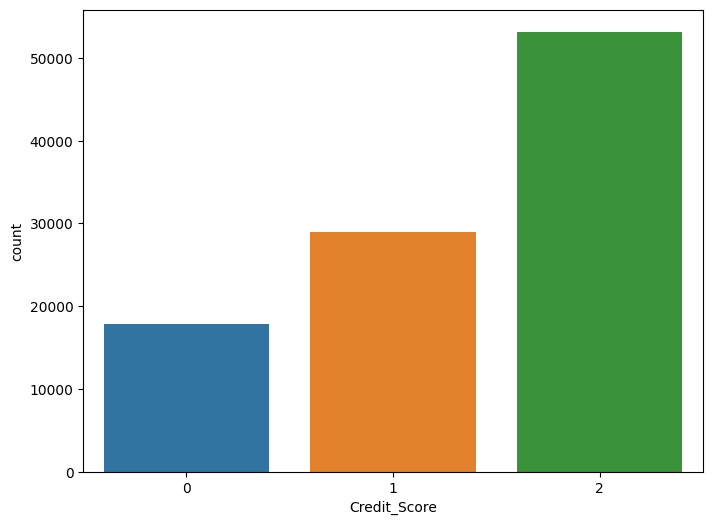

Labels counts in y_train: [39806 39953 39882]
Unique counts in y_train: [0 1 2]
Labels counts in y_test: [13368 13221 13292]
Unique labels in y_test: [0 1 2]


In [9]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

oversampler = RandomOverSampler(sampling_strategy='not majority')
X, y = oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

#use a good scaler to scale the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


target_column = 'Credit_Score'
label_counts = df[target_column].value_counts()
print("Label counts:")
print(label_counts)

#plot the graph to show the distribution of the data
plt.figure(figsize=(8, 6))
sns.countplot(x=target_column, data=df)
plt.show()



print('Labels counts in y_train:', np.bincount(y_train))
print('Unique counts in y_train:', np.unique(y_train))

print('Labels counts in y_test:', np.bincount(y_test))
print('Unique labels in y_test:', np.unique(y_test))


**The most important part  -- Building the model**

We set random.seed as 42 to prevent fluctuatng accuracy values
We use Layers.Dense to create a neural network of 5 layers where:
1. First layer which is the input layer consists of 128 neurons with input dimension of 19
2. Three hidden layers with the `ReLU activation function` 
3. Final output layer with 3 neurons for 3 labels in the `Credit_Score` - `Good`, `Standard`, `Bad` with the `softmax` activation function


Next we compile the process using
`Optimizer` = `adam`
`loss` = `sparse_categorical_crosentropy`
`metrics` = `accuracy`


**Finally we fit the model**

`Setting a higher epoch value may result in a slightly increased accuracy`




In [10]:

np.random.seed(42)
tf.random.set_seed(42)

#train a neural network model for this dataset
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_dim=19),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train_scaled, y_train, epochs=100, batch_size = 128,validation_split=0.25)


Epoch 1/100
702/702 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.3318 - val_loss: nan - val_accuracy: 0.3354
Epoch 2/100
702/702 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.3318 - val_loss: nan - val_accuracy: 0.3354
Epoch 3/100
702/702 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.3318 - val_loss: nan - val_accuracy: 0.3354
Epoch 4/100
702/702 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.3318 - val_loss: nan - val_accuracy: 0.3354
Epoch 5/100
702/702 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.3318 - val_loss: nan - val_accuracy: 0.3354
Epoch 6/100
702/702 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.3318 - val_loss: nan - val_accuracy: 0.3354
Epoch 7/100
702/702 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.3318 - val_loss: nan - val_accuracy: 0.3354
Epoch 8/100
702/702 [====================

First we plot the accuracy and the loss curves with epochs as X label

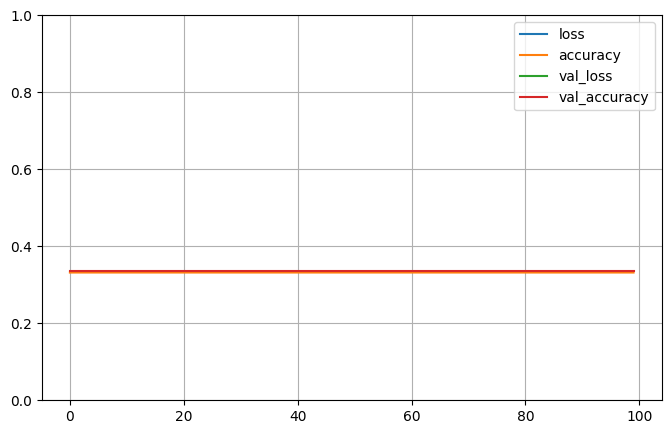

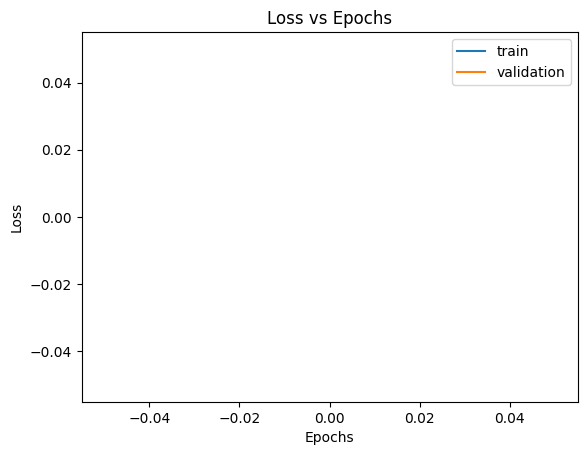

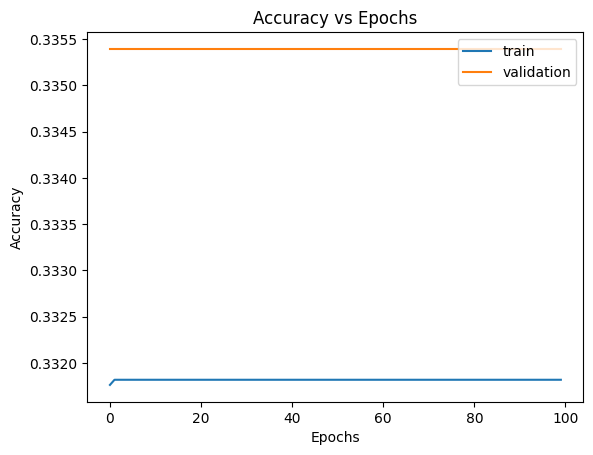

In [11]:

#plot the loss and accuracy curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()



#plot loss vs epochs graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


#plot accuracy vs epochs graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()



Next is the evaluation of the model 

We can use `evaluate` function
We use the `predict` function to test the model and analyse its performance using 
`confusion matrix` , `classification report` , `accuracy_score`


In [12]:

#evaluate the model
results = model.evaluate(X_test, y_test)

print("Loss:", results[0])
print("Accuracy = ", results[1:])

#predict the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
print(classification_report(y_test, y_pred))

#print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


1247/1247 [==============================] - 1s 574us/step - loss: nan - accuracy: 0.3352
Loss: nan
Accuracy =  [0.33519721031188965]
1247/1247 [==============================] - 1s 529us/step
[[13368     0     0]
 [13221     0     0]
 [13292     0     0]]
              precision    recall  f1-score   support

           0       0.34      1.00      0.50     13368
           1       0.00      0.00      0.00     13221
           2       0.00      0.00      0.00     13292

    accuracy                           0.34     39881
   macro avg       0.11      0.33      0.17     39881
weighted avg       0.11      0.34      0.17     39881

Accuracy: 33.52%


c:\Users\Aravind\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aravind\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aravind\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [13]:
#use of different NN models to achieve this accuracy


model = Sequential()
model.add(Dense(64, activation='relu', input_dim=19))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, batch_size=32, epochs=10, validation_data=0.25)



#evaluate the model
results = model.evaluate(X_test, y_test)

print("Loss:", results[0])
print("Accuracy = ", results[1:])

#predict the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
print(classification_report(y_test, y_pred))

#print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Epoch 1/10


ValueError: in user code:

    File "c:\Users\Aravind\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Aravind\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Aravind\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Aravind\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Aravind\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "c:\Users\Aravind\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Aravind\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Aravind\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Aravind\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\Aravind\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible
